In [21]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [22]:
# Reading data from remote link
url = "http://bit.ly/w-data"
w_data = pd.read_csv(url)
print("Data imported successfully")
#Storeing data as w_data

Data imported successfully


In [23]:
w_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
w_data.shape
# dimension of data

(25, 2)

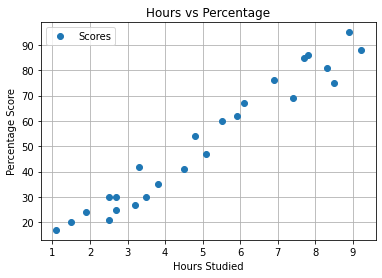

In [25]:
# Plotting the distribution of scores to see relation between variable
w_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True)

In [26]:
#from graph we can see that there is positive corelation between hours studied and percentage score
X = w_data.iloc[:, :-1].values  
y = w_data.iloc[:, 1].values  

In [27]:
# Spliting the data 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


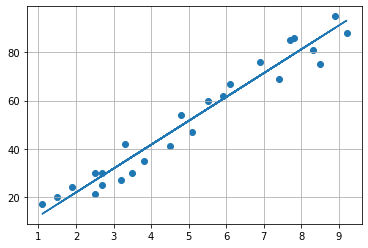

In [29]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid(True)

In [30]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
# You can also test with your own data
hour = float(input("Enter the hour:"))
pdhour=np.array(hour).reshape(-1,1)
own_pred = regressor.predict(pdhour)
print("No of Hours = {}".format(pdhour))
print("Predicted Score = {}".format(own_pred[0]))

Enter the hour:9.25
No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
